In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
train_path ="/content/drive/MyDrive/Colab Notebooks/Machine Learning Assignment"
val_path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning Assignment"



In [35]:
# Set the path to the folder containing the 'train' folder
data_dir = train_path
# Set the image size
image_size = (32, 32)
# Create empty lists for the images and labels
images = []
labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
 folder_path = os.path.join(data_dir, 'train', str(label))
 # Loop over each image in the folder
 for file in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file)
  if file_path.endswith(('.tiff','.bmp')):
 # Load the image and resize it to the desired size
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, image_size)
 # Append the image and label to the lists
    images.append(image)
    labels.append(label)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)


In [36]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path
# Set the image size
image_size_val = (32, 32)
# Create empty lists for the images and labels
images_val = []
labels_val = []
# Loop over each folder from '0' to '9'
for label in range(10):
  folder_path = os.path.join(data_dir_val, 'val', str(label))

 # Loop over each image in the folder
  for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if file_path.endswith(('.tiff','.bmp')):
 # Load the image and resize it to the desired size
      image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
      image = cv2.resize(image, image_size_val)
 # Append the image and label to the lists
      images_val.append(image)
      labels_val.append(label)
# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)
# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)

In [37]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


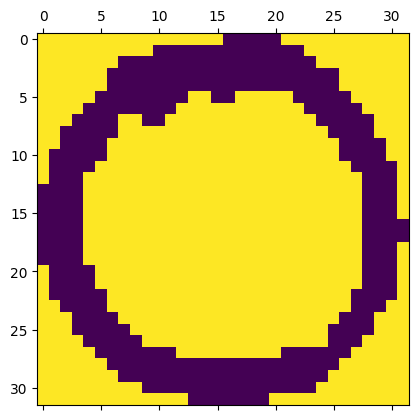

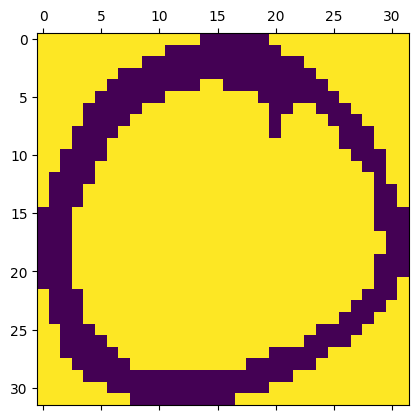

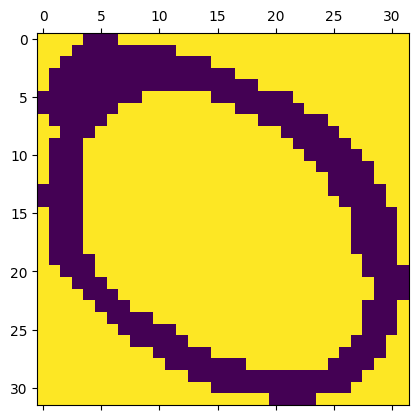

In [38]:
# test the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[99])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[5])

In [39]:
# # flatten the dataset i.e, change 2D to 1D (skipped this , and flattened in the output)
# x_train_flat = x_train.reshape(len(x_train),32*32)
# x_test_flat = x_test.reshape(len(x_test),32*32)
# print(x_train_flat.shape)
# print(x_test_flat.shape)
# x_train_flat[0]

In [40]:

# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
output = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
# compile the nn
output.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the output
# some 10 iterations done here
output.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 1s 14ms/step - loss: 158.0358 - accuracy: 0.3740 - val_loss: 77.0051 - val_accuracy: 0.5955
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 32.2206 - accuracy: 0.7690 - val_loss: 36.5452 - val_accuracy: 0.7247
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 17.0061 - accuracy: 0.8470 - val_loss: 30.6925 - val_accuracy: 0.7697
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 11.3389 - accuracy: 0.8920 - val_loss: 30.1568 - val_accuracy: 0.8258
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 8.2607 - accuracy: 0.9170 - val_loss: 26.3606 - val_accuracy: 0.8258
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 7.6616 - accuracy: 0.9170 - val_loss: 20.2898 - val_accuracy: 0.8483
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 3.8398 - accuracy: 0.9430 - val_loss: 15.6311 - val_accuracy: 0.8764
Epoch 8

In [41]:
# Observation : we see a better accuracy from the 2nd iteration

In [42]:
# now scale and try to check the accuracy, divide dataset by 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255
output.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 13ms/step - loss: 0.9263 - accuracy: 0.7310 - val_loss: 1.3795 - val_accuracy: 0.4326
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.9721 - accuracy: 0.6870 - val_loss: 1.2223 - val_accuracy: 0.5730
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.8610 - accuracy: 0.8000 - val_loss: 1.1108 - val_accuracy: 0.6685
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7923 - accuracy: 0.8510 - val_loss: 1.0443 - val_accuracy: 0.7247
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7497 - accuracy: 0.8930 - val_loss: 1.0005 - val_accuracy: 0.7865
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7201 - accuracy: 0.9210 - val_loss: 0.9702 - val_accuracy: 0.8258
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.9370 - val_loss: 0.9478 - val_accuracy: 0.8652
Epoch 8/10
32/32 [=

In [43]:
# Observation : we got better result for all iterations on scaling the training dataset

In [44]:
# evaluate test dataset
output.evaluate(x_test_scaled,y_test)


6/6 [==============================] - 0s 5ms/step - loss: 0.9036 - accuracy: 0.8989


[0.9035807251930237, 0.898876428604126]

In [45]:

# Observation : result almost same as the training dataset,

6/6 [==============================] - 0s 2ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


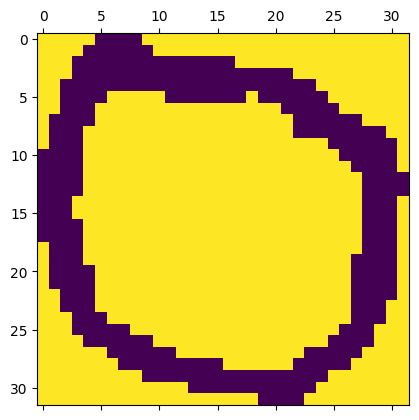

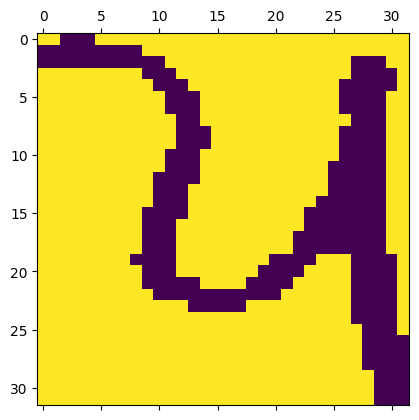

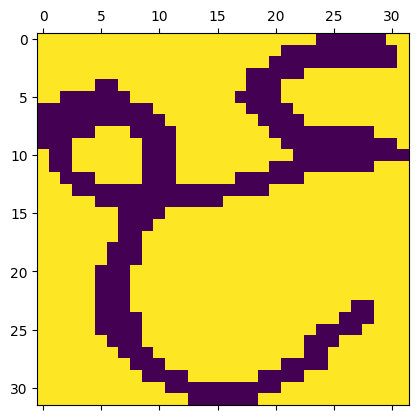

In [46]:
# predict 1st image
plt.matshow(x_test[0])
y_predicted = output.predict(x_test_scaled)
y_predicted[0]
# this showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_predicted[0]))
# test some more values
plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))
plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))

In [47]:

# some predictions may not be not right
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_matrix

[0, 0, 0, 9, 0, 8, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 7, 1, 1, 1, 7, 1, 1, 1, 1, 7, 7, 1, 8, 1, 7, 1, 5, 2, 2, 9, 2, 2, 2, 2, 2, 2, 6, 2, 2, 9, 2, 9, 9, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 1, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[15,  0,  0,  0,  0,  0,  0,  0,  1,  2],
       [ 0, 10,  0,  0,  0,  0,  0,  5,  1,  0],
       [ 0,  0, 11,  0,  0,  1,  1,  0,  0,  4],
       [ 0,  0,  0, 16,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

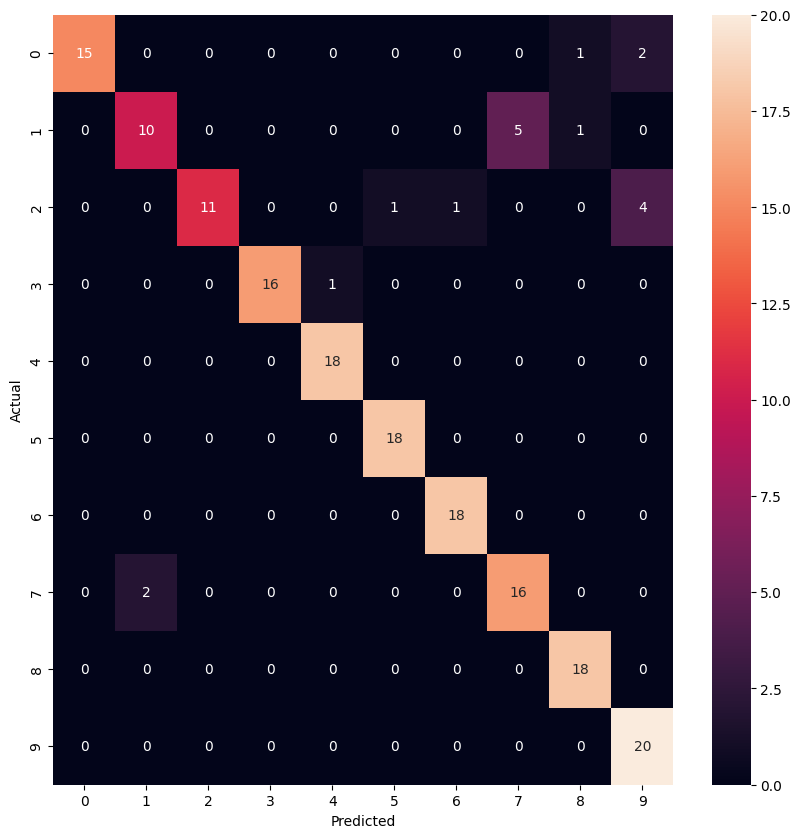

In [48]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [49]:
# here we can see there are some errors
# we need to modify our nn, we add some layers in the above output and different activation function

In [50]:
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy
output2 = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
# compile the nn
output2.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the output
# some 10 iterations done here
history = output2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 24ms/step - loss: 0.9908 - accuracy: 0.7200 - val_loss: 0.3847 - val_accuracy: 0.8764
Epoch 2/10
32/32 [==============================] - 1s 18ms/step - loss: 0.2068 - accuracy: 0.9250 - val_loss: 0.3921 - val_accuracy: 0.8539
Epoch 3/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0965 - accuracy: 0.9690 - val_loss: 0.2108 - val_accuracy: 0.9438
Epoch 4/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0630 - accuracy: 0.9810 - val_loss: 0.2706 - val_accuracy: 0.9157
Epoch 5/10
32/32 [==============================] - 1s 17ms/step - loss: 0.0586 - accuracy: 0.9810 - val_loss: 0.4477 - val_accuracy: 0.8596
Epoch 6/10
32/32 [==============================] - 1s 17ms/step - loss: 0.0684 - accuracy: 0.9710 - val_loss: 0.3589 - val_accuracy: 0.9157
Epoch 7/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0272 - accuracy: 0.9950 - val_loss: 0.2190 - val_accuracy: 0.9438
Epoch 8/10
32

In [51]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier
# evaluate test dataset on modified output
output2.evaluate(x_test_scaled,y_test)


6/6 [==============================] - 0s 6ms/step - loss: 0.2099 - accuracy: 0.9382


[0.20990025997161865, 0.9382022619247437]

In [52]:
# Earlier we got 0.898876428604126 now we got 0.9382022619247437 accuracy
# redo the confusion matrix
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted = output2.predict(x_test_scaled)
y_predicted[0]
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_matrix


6/6 [==============================] - 0s 4ms/step
[0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 7, 7, 1, 1, 1, 1, 7, 7, 1, 1, 1, 7, 1, 5, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 1, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0, 14,  1,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

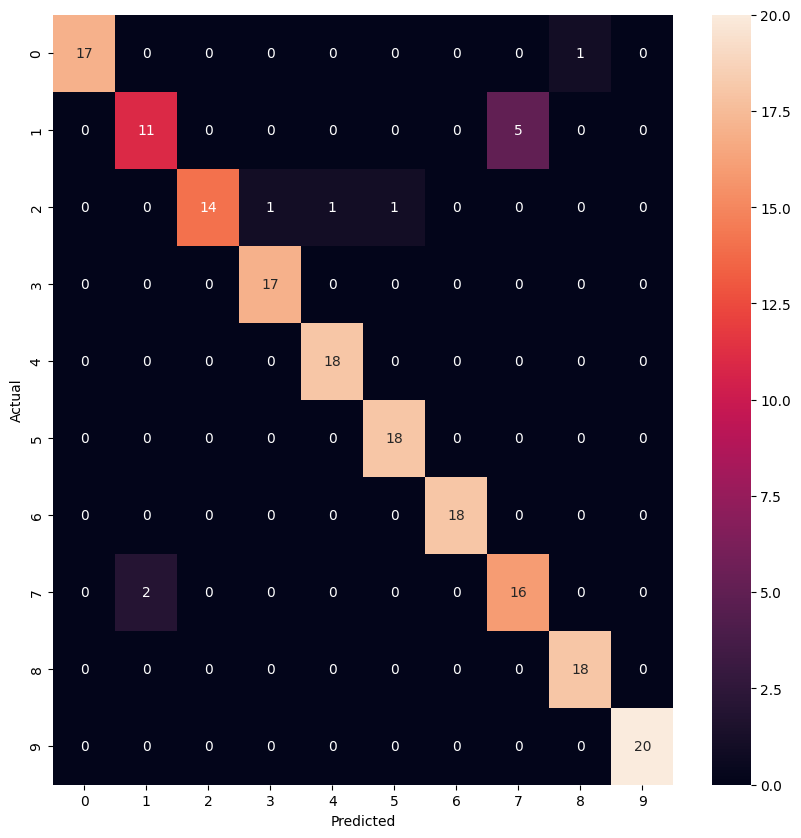

In [53]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

6/6 [==============================] - 0s 3ms/step - loss: 27.2503 - accuracy: 0.8371
Test accuracy: 0.8370786309242249


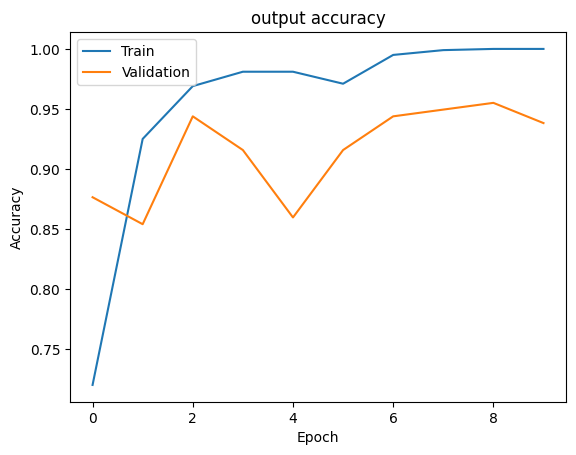

In [54]:
# Observatoin : we see in the updated output, there are less number of errors,
# whatever is not in diagonal is a error
# Evaluate the output
test_loss, test_acc = output.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('output accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()